# Preparations

In [1]:
# TensorFlow
import tensorflow as tf
import tensorboard as tb
# Data handling
import pandas as pd
import numpy as np
# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
# Other stuff
import itertools
import datetime
import time
import pickle
import functools
import json
import sys
import os
import shutil
from PIL import Image
from scipy.stats import norm

In [2]:
# Base path for functions
base_path = "C:/repos/"
sys.path.append(base_path)

# Path to save figures
figures_path = base_path + "twrds_unbiased_anns/figures/"

# Shape Examples

In [3]:
from twrds_unbiased_anns.src.data.shapes import make_square, make_circle

In [10]:
data = make_square('white', 150)
img = Image.fromarray(data, 'RGB')
img.save('C:\\Users\\lucas\\OneDrive\\Dokumente\\MSc Cognitive Science\\3 WiSe 20\\Master Thesis\\3 Figures\\Shapes\\white_square_150_noisy.png')

data = make_circle('red', 20)
img = Image.fromarray(data, 'RGB')
img.save('C:\\Users\\lucas\\OneDrive\\Dokumente\\MSc Cognitive Science\\3 WiSe 20\\Master Thesis\\3 Figures\\Shapes\\red_circle_20_noisy.png')

255.0
255.0
255.0
255.0
0.0
0.0


# Data Examples

## Evaluation Sample

In [3]:
from twrds_unbiased_anns.src.data.eval import load_eval_samples

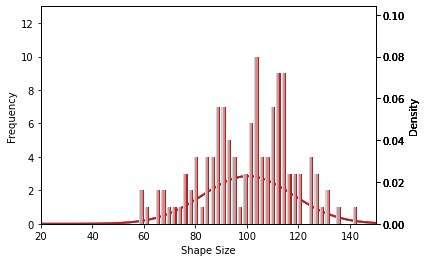

In [5]:
eval_sample_filename = "C:/repos/twrds_unbiased_anns/data/eval/eval_500_mean_100_std_20.data"
labels = ["White Shapes", "Red Shapes"]
bins = 40
color_white_square = "lightgrey"
color_white_circle = "darkgrey"
color_colorful_square = "lightcoral"
color_colorful_circle = "firebrick"
colors = [color_white_square, color_white_circle, color_colorful_square, color_colorful_circle]

eval_sample = load_eval_samples(eval_sample_filename)
df_eval_raw = pd.DataFrame(eval_sample)
df_eval = pd.DataFrame(df_eval_raw[0][0])
df_eval = df_eval.append(pd.DataFrame(df_eval_raw[0][1]))
df_eval = df_eval.append(pd.DataFrame(df_eval_raw[0][2]))
df_eval = df_eval.append(pd.DataFrame(df_eval_raw[0][3]))
df_eval.columns = ["is_white", "is_square", "shape_size"]
# Plot results  
fig = plt.plot(figsize=(10,3.75))
ax = plt.gca()
w = df_eval[df_eval['is_white'] == 1.0]
r = df_eval[df_eval['is_white'] == 0.0]
actual_ws = w[w['is_square'] == 1.0].shape_size	
actual_wc = w[w['is_square'] == 0.0].shape_size
actual_rs = r[r['is_square'] == 1.0].shape_size	
actual_rc = r[r['is_square'] == 0.0].shape_size
data = [actual_ws, actual_wc, actual_rs, actual_rc]
ax.set_xlim(20,150)
ax.set_ylim(0,13)   
ax.hist(data, color = colors, bins = bins, label = labels)
ax.set_ylabel('Frequency')  
ax.set_xlabel('Shape Size')
for cat_data, color in zip(data, colors):
  # Fit a normal distribution to the data
  mu, std = norm.fit(cat_data)
  # Calculate PDF
  xmin, xmax = 20, 150
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  # Plot PDF
  ax2 = ax.twinx()
  ax2.plot(x, p, color = color, linewidth = 2)
  # Calcualte ylim of second axis based on first axis      
  ylim_max_1 = ax.get_ylim()[1]
  ylim_max_2 = ylim_max_1 / (df_eval.shape_size.size/4)
  ax2.set_ylim([0, ylim_max_2])
  ax2.set_ylabel('Density')
# Fix plot display order
ax.set_zorder(ax2.get_zorder()+1)
ax.patch.set_visible(False)
# Save plot
plt.savefig(figures_path + "eval_example", dpi = 200, bbox_inches = 'tight')
# Show plot
plt.show()  

## Data Samples

In [10]:
from twrds_unbiased_anns.src.data.samples import create_sample_array, get_sample_params

In [38]:
def plot_training_sample(sample, filepath):
    df = pd.DataFrame(sample)
    df.columns = ["iswhite", "issquare", "size"]

    # Plot parameters
    bins = 40
    ncols = 1
    color_white = "lightgrey"
    color_colorful = "lightcoral"
    colors = [color_white, color_colorful]

    fig = plt.plot(figsize=(10,3.75))
    ax = plt.gca()
    actual_white = df[df['iswhite'] == 1.0]["size"]
    actual_color = df[df['iswhite'] == 0.0]["size"]
    data = [actual_white, actual_color]
    ax.hist(data, color = colors, bins = bins, label = ["White Shapes", "Colorful Shapes"])
    ax.set_ylim([0, 33])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Shape Size')
    for cat_data, color in zip(data, colors):
        # Fit a normal distribution to the data
        mu, std = norm.fit(cat_data)
        # Calculate PDF
        xmin, xmax = 20, 150
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        # Plot PDF
        ax2 = ax.twinx()
        ax2.plot(x, p, color = color, linewidth = 2)
        # Share secondary axis
        ax2.set_ylim([0, 0.085])
        ax2.set_ylabel('Density')

    # Save plot
    plt.savefig(filepath, dpi = 200, bbox_inches = 'tight')

    # Show plot
    plt.show()

In [11]:
# Stddev 30
white_square, white_circle, colorful_square, colorful_circle = get_sample_params("color", 50, 30, 50)
train_sample_30 = create_sample_array(300, white_square, white_circle, colorful_square, colorful_circle)
#plot_training_sample(train_sample_30, filepath = figures_path + "training/train_example_30.png")

# Stddev 10
white_square, white_circle, colorful_square, colorful_circle = get_sample_params("color", 50, 10, 50)
train_sample_10 = create_sample_array(400, white_square, white_circle, colorful_square, colorful_circle)
#plot_training_sample(train_sample_10, filepath = figures_path + "trainingg/train_example_10.png")

# Stddev 5
white_square, white_circle, colorful_square, colorful_circle = get_sample_params("color", 50, 5, 50)
train_sample_5 = create_sample_array(300, white_square, white_circle, colorful_square, colorful_circle)
#plot_training_sample(train_sample_5, filepath = figures_path + "training/train_example_5.png")

### Correlation of Target Size and Color

In [18]:
def calculate_correlation(sample):
    df = pd.DataFrame(sample)
    df.columns = ["color", "shape", "size"]
    print(df.corr(method = "pearson")["color"]["size"])
    
calculate_correlation(train_sample_30)
calculate_correlation(train_sample_10)
calculate_correlation(train_sample_5)

0.6819758773145728
0.8456300693120365
0.8553941908302626


## Curve Overlap

In [50]:
import itertools
from statistics import NormalDist

Overlap for mean difference 5 and SD 3: 0.27409654986227894


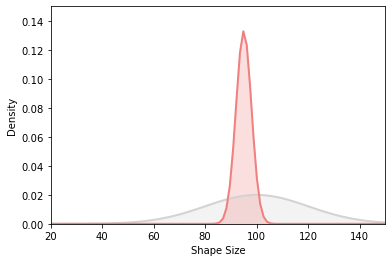

Overlap for mean difference 5 and SD 10: 0.6596642179391075


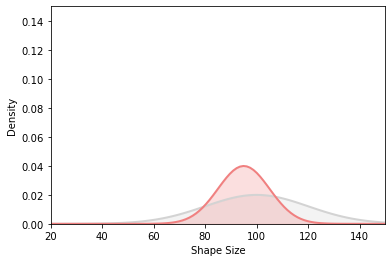

Overlap for mean difference 5 and SD 20: 0.9005235503397742


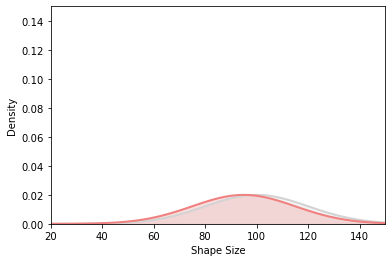

Overlap for mean difference 15 and SD 3: 0.22290744269538676


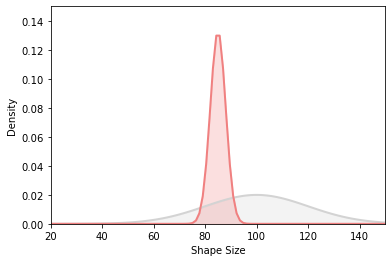

Overlap for mean difference 15 and SD 10: 0.5371764347880239


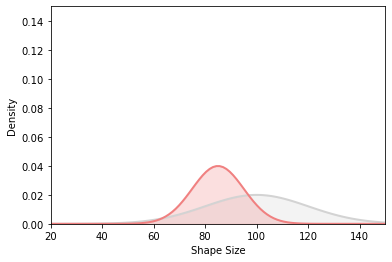

Overlap for mean difference 15 and SD 20: 0.7076604666545525


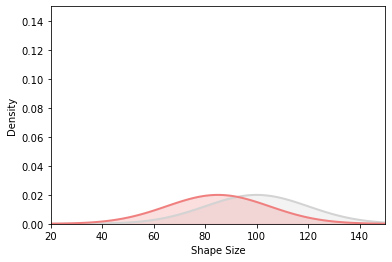

Overlap for mean difference 30 and SD 3: 0.10979752312024482


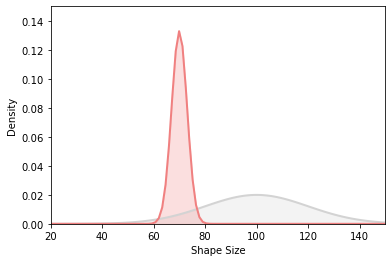

Overlap for mean difference 30 and SD 10: 0.2922167903295805


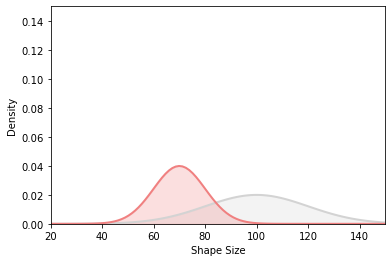

Overlap for mean difference 30 and SD 20: 0.4532547047537364


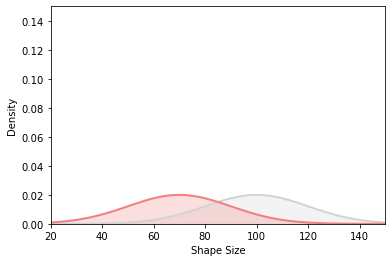

In [53]:
color_white = "lightgrey"
color_colorful = "lightcoral"

mean_diffs = [5, 15, 30]
stddevs = [3,10,20]

for (m_diff, std) in itertools.product(mean_diffs, stddevs):
  dist_1 = NormalDist(mu=100, sigma=20)
  dist_2 = NormalDist(mu=100-m_diff, sigma=std)
  overlap = dist_1.overlap(dist_2)
  print("Overlap for mean difference {} and SD {}: {}".format(m_diff, std, overlap))
  # Plot the distribution
  xmin, xmax = 20, 150
  x = np.linspace(xmin, xmax, 100)
  p_1 = [dist_1.pdf(xval) for xval in x]
  p_2 = [dist_2.pdf(xval) for xval in x]
  # Plot PDFs
  fig = plt.plot(figsize=(10,3.75))
  ax = plt.gca()
  ax.plot(x, p_1, color = color_white, linewidth = 2)
  ax.plot(x, p_2, color = color_colorful, linewidth = 2)  
  # Fill overlap
  plt.fill_between(x,p_1,0, color = color_white, alpha = 0.25)
  plt.fill_between(x,p_2,0, color = color_colorful, alpha = 0.25)
  # Set labels
  ax.set_ylabel('Density')
  ax.set_xlabel('Shape Size')
  # Set axis limits
  ax.set_xlim([20, 150])
  ax.set_ylim([0, 0.15])
  # Save and show plot
  plt.savefig(figures_path + "/overlap/overlap_mdiff_{}_std_{}".format(m_diff, std), dpi = 200, bbox_inches = 'tight')
  plt.show()

# Models

## Small Model

In [4]:
from twrds_unbiased_anns.src.tf.models import get_simple_cnn, get_small_cnn, get_mini_cnn

In [5]:
model = get_simple_cnn()
model.summary()

Model: "Simple_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       [(None, 360, 360, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 360, 360, 32)      896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 180, 180, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 180, 180, 64)      18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 90, 90, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 90, 90, 64)        36928     
_________________________________________________________________
flat_1 (Flatten)             (None, 518400)            0

In [6]:
model = get_small_cnn()
model.summary()

Model: "Small_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       [(None, 360, 360, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 360, 360, 16)      448       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 90, 90, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 90, 90, 32)        4640      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 22, 22, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 32)        9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 15488)             0 

In [7]:
model = get_mini_cnn()
model.summary()

Model: "Small_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       [(None, 360, 360, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 360, 360, 8)       224       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 45, 45, 8)         0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 45, 45, 16)        1168      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 5, 5, 16)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 5, 5, 16)          2320      
_________________________________________________________________
flat_1 (Flatten)             (None, 400)               0 